## Importing Modules and Libraries

In [1]:
import pandas as pd 
import numpy as np
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
import math
from IPython.display import Markdown, display ,HTML

from sklearn.model_selection import train_test_split

sns.set(style="whitegrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) # make sure data and columns are displayed correctly withput purge
pd.options.display.float_format = '{:20,.2f}'.format # display float value with correct precision 

warnings.filterwarnings('ignore')

C:\Users\Asus\AppData\Local\Temp/ipykernel_27112/1323306634.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1) # make sure data and columns are displayed correctly withput purge


In [2]:
DF=pd.read_csv('telecom_churn_data.csv')
DF.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,Na

In [3]:
DF.shape

(99999, 226)

In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
DF.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,"99,999.00","99,999.00","98,981.00","98,981.00","98,981.00","99,999.00","99,999.00","99,999.00","99,999.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00",

### Analysing Data

**Now Let's Look at and Treat Missing Values if any.**

In [6]:
# checak for percentage of missing values in the DATA.
Missing_Vals_Column=(round(((DF.isnull().sum()/len(DF.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
Missing_Vals_Column

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
...,...
max_rech_amt_7,0.00
max_rech_amt_6,0.00
total_rech_amt_9,0.00
total_rech_amt_8,0.00


As we can see here there are columns with as high as 74.85 % of missing values. So we take a rough estimate of 40% and remove the columns having missing values more than 40%. This will help in removing the unnecessary columns.

In [7]:
Missing_Vals_Column_40=list(Missing_Vals_Column.index[Missing_Vals_Column['null'] > 40])
Missing_Vals_Column_40

['arpu_3g_6',
 'night_pck_user_6',
 'total_rech_data_6',
 'arpu_2g_6',
 'max_rech_data_6',
 'fb_user_6',
 'av_rech_amt_data_6',
 'date_of_last_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'fb_user_7',
 'max_rech_data_7',
 'night_pck_user_7',
 'count_rech_2g_7',
 'av_rech_amt_data_7',
 'arpu_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'total_rech_data_9',
 'count_rech_3g_9',
 'fb_user_9',
 'max_rech_data_9',
 'arpu_3g_9',
 'date_of_last_rech_data_9',
 'night_pck_user_9',
 'arpu_2g_9',
 'count_rech_2g_9',
 'av_rech_amt_data_9',
 'total_rech_data_8',
 'arpu_3g_8',
 'fb_user_8',
 'night_pck_user_8',
 'av_rech_amt_data_8',
 'max_rech_data_8',
 'count_rech_3g_8',
 'arpu_2g_8',
 'count_rech_2g_8',
 'date_of_last_rech_data_8']

In [8]:
DF=DF.drop(Missing_Vals_Column_40, axis=1)

In [9]:
DF.shape

(99999, 186)

Also, removing all the Date columns as we do not require Date columns.

In [10]:
date_cols=[d for d in DF.columns.to_list() if 'date' in d]  ## Printed the name of date columns.
print(date_cols)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [11]:
DF=DF.drop(date_cols, axis=1)

#### Filtering High-Valued Customers
**Creating column avg_recharge_6_7 by adding total recharge amount of 6 & 7 month, then take avg of sum.**

**Define high-value customers as follows:**

Those who have recharged with an amount more than or equal to X, where X is greater than 70th percentile of the average recharge amount in the first two months (the good phase)

In [12]:
DF['avg_rech_6_7']=(DF['total_rech_amt_6']+DF['total_rech_amt_7'])/2

In [13]:
#Finding 70th percentile for the new column
X=DF['avg_rech_6_7'].quantile(0.7)
X

368.5

In [14]:
# filtering only the customers who have recharger more than X i.e are HIGH-VALUE Customers.
DF=DF[DF['avg_rech_6_7'] >= X]
DF.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7
7,7000701601,109,0.00,0.00,0.00,"1,069.18","1,349.85","3,171.48",500.00,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.00,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.00,0.00,0.00,NaN,60.86,75.14,77.84,NaN,0.00,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.00,0.00,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.00,0.00,0.00,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.00,0.00,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,"1,185.00"
8,7001524846,109,0.00,0.00,0.00,378.72,492.22,137.36,166.79,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.00,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,0.00,0.00,508.36,431.66,171.56,142.18,23.84,9.84,0.31,

**Checking if rows have any missing values**

In [15]:
# counting the rows having more than 50% missing values.
Missing_rows=DF[(DF.isnull().sum(axis=1)) > (len(DF.columns)//2)]
Missing_rows

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7
2185,7000237332,109,NaN,NaN,NaN,386.51,386.51,386.49,386.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,2,4,455,455,455,455,455,455,455,455,455,455,455,0,3.65,71.00,11.73,9.97,285.63,"2,316.13","1,429.59","1,205.97",0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,882,172.71,657.55,9.22,0.00,455.00
3506,7002324263,109,NaN,NaN,NaN,996.56,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,0,0,875,0,0,0,550,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [16]:
# Removing the above 114 rows
DF=DF.drop(Missing_rows.index)
DF.shape

(29897, 179)

In [17]:
Missing_Vals_Column=(round(((DF.isnull().sum()/len(DF.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
print(Missing_Vals_Column)

                                 null
spl_og_mou_9                     5.32
loc_og_t2t_mou_9                 5.32
std_og_t2f_mou_9                 5.32
loc_ic_mou_9                     5.32
loc_ic_t2m_mou_9                 5.32
...                               ...
max_rech_amt_6                   0.00
max_rech_amt_7                   0.00
max_rech_amt_8                   0.00
max_rech_amt_9                   0.00
avg_rech_6_7                     0.00

[179 rows x 1 columns]


##### Counting the number unique values present in the columns.

In [18]:
## Counting the number unique values present in the columns.
def unique_nan(s):
    return s.nunique(dropna=False)

In [19]:
unique_nan(DF)

mobile_number     29897
circle_id         1    
loc_og_t2o_mou    1    
std_og_t2o_mou    1    
loc_ic_t2o_mou    1    
                 ..    
aug_vbc_3g        7255 
jul_vbc_3g        7276 
jun_vbc_3g        6820 
sep_vbc_3g        2170 
avg_rech_6_7      3025 
Length: 179, dtype: int64

**We will drop the columns with only 1 unique value as they will not add any valueable insight for our future models.**

In [20]:
unique_cols_to_drop=['loc_og_t2o_mou','std_ic_t2o_mou_9','circle_id','std_ic_t2o_mou_7','std_ic_t2o_mou_6','std_og_t2c_mou_9',
                    'std_og_t2c_mou_8','std_og_t2c_mou_7','std_og_t2c_mou_6','loc_ic_t2o_mou','std_og_t2o_mou','std_ic_t2o_mou_8']

In [21]:
DF.drop(unique_cols_to_drop, axis=1, inplace=True)

In [22]:
(DF.shape[1])

167

**_________________________________________________________________________________________________________________________________________________________________**

**Again checking for Null Values**

In [23]:
Missing_Vals_Column=(round(((DF.isnull().sum()/len(DF.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
Missing_Vals_Column

,null
og_others_9,5.32
roam_ic_mou_9,5.32
loc_og_t2f_mou_9,5.32
loc_og_t2m_mou_9,5.32
isd_og_mou_9,5.32
...,...
max_rech_amt_8,0.00
max_rech_amt_9,0.00
last_day_rch_amt_6,0.00
last_day_rch_amt_7,0.00


In [24]:
DF_Dict=DF.isnull().sum().to_dict()

Null_Cols=[k for k, v in DF_Dict.items() if v > 0]

len(Null_Cols)

108

📌 As we we can see there are 108 columns with Null values remaining, and since most of them have maximum 5% nulls, we can impute them with 0 as all the columns are of duration for a Type of call made, So 0 would mean No call of that particular type was made by that customer. 

In [25]:
DF.fillna(0,inplace=True)

In [26]:
DF_Dict_2=DF.isnull().sum().to_dict()

not_Null_Cols=[k for k, v in DF_Dict_2.items() if v > 0]

len(not_Null_Cols)

0

📌 Finally there are No more NULL values present in the DATA.

_________________________________________________________________________________________________________________

**Tagging the CHURNERS**

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

In [27]:
DF['Churn']= np.where((DF['total_ic_mou_9']==0) & (DF['total_og_mou_9']==0) & (DF['vol_2g_mb_9']==0) & (DF['vol_3g_mb_9']==0), 1, 0)

In [28]:
DF.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,Churn
7,7000701601,"1,069.18","1,349.85","3,171.48",500.00,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.00,0.00,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.00,0.18,10.01,0.00,4.50,0.00,6.50,0.00,0.00,0.00,0.00,0.00,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,101.46,39.53,0.00,427.88,355.23,188.04,0.00,36.89,11.83,30.39,0.00,91.44,126.99,141.33,0.00,52.19,34.24,22.21,0.00,180.54,173.08,193.94,0.00,626.46,558.04,428.74,0.00,0.21,0.00,0.00,0.00,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,"1,185.00",1
8,7001524846,378.72,492.22,137.36,166.79,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.00,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,0.00,0.00,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.00,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,1

**Listing all the columns for churn phase i.e month(9)**

In [29]:
columns_9 = [col for col in DF.columns.to_list() if '_9' in col]
print(columns_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [30]:
# Deleting the churn month columns
DF = DF.drop(columns_9, axis=1)

In [31]:
# Dropping sep_vbc_3g column
DF = DF.drop('sep_vbc_3g', axis=1)

In [32]:
# Checking for the CHURN rate
round(100*(DF['Churn'].mean()),2)

8.5

📌 This tells us that 8.5% customers have churned. Which indicates class imbalance, we will take care of it at later point by using SMOTE.

******************************************************************************************************************************

Converting the MobileNumber and Churn columns to Object data type in order to proceed with Outlier Treatment.

In [33]:
DF['mobile_number'] = DF['mobile_number'].astype(object)
DF['Churn'] = DF['Churn'].astype(object)

In [34]:
# Listing numeric columns only
num_cols = DF.select_dtypes(exclude=['object']).columns
print(num_cols)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_6_7'],
      dtype='object', length=125)


In [35]:
# Removing outliers below 10th and above 90th percentile
for col in num_cols: 
    q1 = DF[col].quantile(0.10)
    q3 = DF[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into new_DF
    new_DF = DF.loc[(DF[col] > range_low) & (DF[col] < range_high)]

new_DF.shape

(29586, 127)

In [36]:
# List the columns of total mou, rech_num and rech_amt
[total for total in new_DF.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

**Adding Some New Columns with some insights**

Adding **dec_rech_action**

Indicating if the nUmber of rechabrge for a customer when compared to good phase is decreased in action phase or not

In [37]:
# Avg recharge number at action phase
# We are taking average because there are two months(7 and 8) in action phase
new_DF['avg_rech_num_action'] = (new_DF['total_rech_num_7'] + new_DF['total_rech_num_8'])/2
# Difference between total_rech_num_6 and avg_rech_action
new_DF['diff_rech_num'] = new_DF['avg_rech_num_action'] - new_DF['total_rech_num_6']

In [38]:
# Checking if recharge number has decreased in action phase, 1=Yes, 0=No
new_DF['dec_rech_action'] = np.where((new_DF['diff_rech_num'] < 0), 1, 0)

In [39]:
new_DF.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,Churn,avg_rech_num_action,diff_rech_num,dec_rech_action
7,7000701601,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,"1,185.00",1,6.00,1.00,0
8,7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.00,0,17.50,-1.50,1
13,7002191713,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.00,0.00,1.29,0.00,0.00,4.78,0.00,0.00,0.00,907.09,192.41,"1,015.26",67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,"1,144.53",0.45,0.00,0.00,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.00,0.00,0.02,0.00,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.00,0,7.50,1.50,0
16,7000875565,430.98,299.87,187.89,50.5

Adding **dec_avg_revenuePC_action**

Indicating if average revenue per customer when compared to good phase is decreased in action phase or not

In [40]:
# average ARUP in action phase
# We are taking average because there are two months(7 and 8) in action phase
new_DF['avg_arpu_action'] = (new_DF['arpu_7'] + new_DF['arpu_8'])/2
# Difference of good and action phase ARPU
new_DF['diff_arpu'] = new_DF['avg_arpu_action'] - new_DF['arpu_6']

In [41]:
# Checking whether the arpu has decreased on the action month, 1=Yes, 0=No
new_DF['dec_avg_revenuePC_action'] = np.where((new_DF['diff_arpu'] < 0), 1, 0)

In [42]:
new_DF.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,Churn,avg_rech_num_action,diff_rech_num,dec_rech_action,avg_arpu_action,diff_arpu,dec_avg_revenuePC_action
7,7000701601,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,"1,185.00",1,6.00,1.00,0,"2,260.66","1,191.48",0
8,7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.00,0,17.50,-1.50,1,314.79,-63.93,1
13,7002191713,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.00,0.00,1.29,0.00,0.00,4.78,0.00,0.00,0.00,907.09,192.41,"1,015.26",67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,"1,144.53",0.45,0.00,0.00,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.00,0.00,0.02,0.00,0.00,0.00,0,0,0,0,0,3,0

Adding **dec_rech_amt_action**

Indicating if recharge amount of customers when compared to good phase is decreased in action phase or not

In [43]:
# Avg recharge amount in action phase
# We are taking average because there are two months(7 and 8) in action phase
new_DF['avg_rech_amt_action'] = (new_DF['total_rech_amt_7'] + new_DF['total_rech_amt_8'])/2
# Difference of action phase recharge amount and good phase recharge amount
new_DF['diff_rech_amt'] = new_DF['avg_rech_amt_action'] - new_DF['total_rech_amt_6']

In [44]:
# Checking if recharge amount has decreased in action phase, 1=Yes, 0=No
new_DF['dec_rech_amt_action'] = np.where((new_DF['diff_rech_amt'] < 0), 1, 0) 

In [45]:
new_DF.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,Churn,avg_rech_num_action,diff_rech_num,dec_rech_action,avg_arpu_action,diff_arpu,dec_avg_revenuePC_action,avg_rech_amt_action,diff_rech_amt,dec_rech_amt_action
7,7000701601,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,"1,185.00",1,6.00,1.00,0,"2,260.66","1,191.48",0,"2,214.00",634.00,0
8,7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.00,0,17.50,-1.50,1,314.79,-63.93,1,360.50,-76.50,1
13,7002191713,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.00,0.00,1.29,0.00,0.00,4.78,0.00,0.00,0.00,907.09,192.41,"1,015.26",67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,"1,144.53",0.45,0.00,0.00,245.28,62.11,393.39,83.48,16.24

Adding **dec_MOU_action**

Indicating if Minutes of Usages for the customers when compared to good phase is decreased in action phase or not

In [46]:
# Total mou at good phase incoming and outgoing
new_DF['total_mou_good'] = (new_DF['total_og_mou_6'] + new_DF['total_ic_mou_6'])
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
new_DF['avg_mou_action'] = (new_DF['total_og_mou_7'] + new_DF['total_og_mou_8'] + new_DF['total_ic_mou_7'] + new_DF['total_ic_mou_8'])/2

# Difference avg_mou_good and avg_mou_action
new_DF['diff_mou'] = new_DF['avg_mou_action'] - new_DF['total_mou_good']


In [47]:
# Checking whether the mou has decreased in action phase, 1=Yes, 0=No
new_DF['dec_MOU_action'] = np.where((new_DF['diff_mou'] < 0), 1, 0)

In [48]:
new_DF.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,Churn,avg_rech_num_action,diff_rech_num,dec_rech_action,avg_arpu_action,diff_arpu,dec_avg_revenuePC_action,avg_rech_amt_action,diff_rech_amt,dec_rech_amt_action,total_mou_good,avg_mou_action,diff_mou,dec_MOU_action
7,7000701601,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,"1,185.00",1,6.00,1.00,0,"2,260.66","1,191.48",0,"2,214.00",634.00,0,"1,113.99",973.09,-140.90,1
8,7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.00,0,17.50,-1.50,1,314.79,-63.93,1,360.50,-76.50,1,612.22,324.12,-288.10,1
13,7002191713,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.00,0.00,1.29,0.00,0.00,4.78,0.00,0.00,0.00,907.09,192.41,"1,015.26",67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,

**-----------------------------------------------------------------------------------------------------------------------**

## EDA

**Univariate Analysis**

Churn rate on the basis whether the customer decreased her/his MOU in action month

In [49]:
# Converting churn column to int in order to do aggfunc in the pivot table
new_DF['Churn'] = new_DF['Churn'].astype('int64')

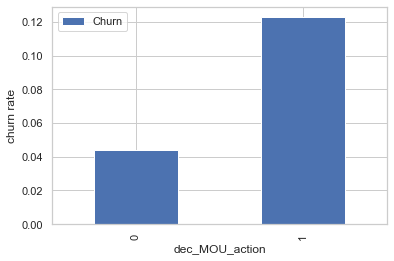

In [50]:
new_DF.pivot_table(values='Churn', index='dec_MOU_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

📌 We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.

**-------------------------------------------------------------------------------------------------------------------------**

Churn rate on the basis whether the customer decreased her/his amount of recharge in action month

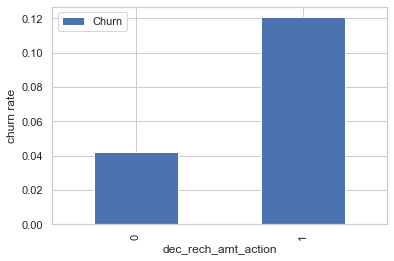

In [51]:
new_DF.pivot_table(values='Churn', index='dec_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

📌 Here also we see the same behaviour. The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

**-------------------------------------------------------------------------------------------------------------------------**

Churn rate on the basis whether the customer decreased her/his number of recharge in action month

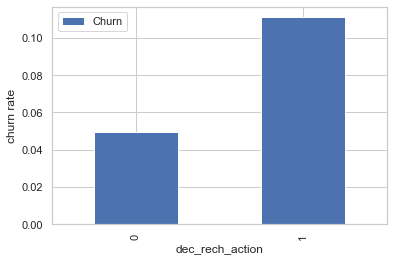

In [52]:
new_DF.pivot_table(values='Churn', index='dec_rech_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

📌 Here we see the expected result. The churn rate is more for the customers,number of recharge in the action phase is lesser than the number in good phase. From the above 3 plots it shows that the customers do not do the monthly recharge more when they are in the action phase.

**---------------------------------------------------------------------------------------------------------------------------**

Analysis of the minutes of usage MOU (churn and not churn) in the action phase

In [53]:
# Creating churn dataframe
Data_churn = new_DF[new_DF['Churn'] == 1]
# Creating not churn dataframe
Data_Non_churn = new_DF[new_DF['Churn'] == 0]

[Text(0.5, 0, 'Action phase MOU')]

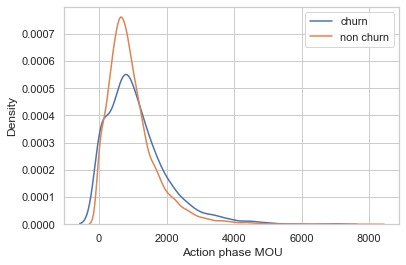

In [54]:
# Distribution plot
ax = sns.distplot(Data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(Data_Non_churn['total_mou_good'],label='non churn',hist=False)
plt.legend(loc='best')
ax.set(xlabel='Action phase MOU')

📌 Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2500 range. Higher the MOU, lesser the churn probability.

**BiVariate Analysis**

Analising recharge amount and number of recharge in action month

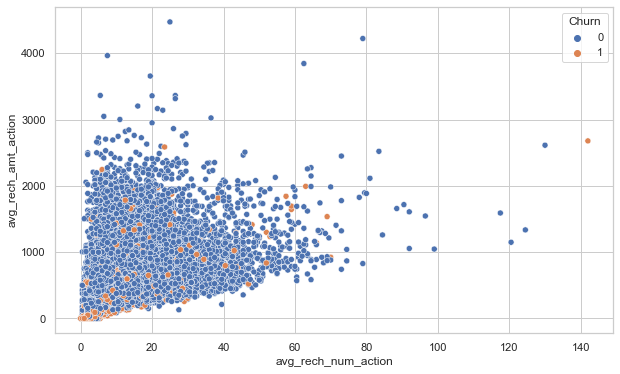

In [55]:
plt.figure(figsize=(10,6))
fig = sns.scatterplot('avg_rech_num_action','avg_rech_amt_action', hue='Churn', data=new_DF)

📌 We can see from the above pattern that the recharge number and the recharge amount are almost propotional. Higher the number of recharge, Higher is the amount of the recharge

**------------------------------------------------------------------------------------------------------------------------------------------**


Analizing churn rate WRT the decreasing recharge amount and number of recharge during the action phase

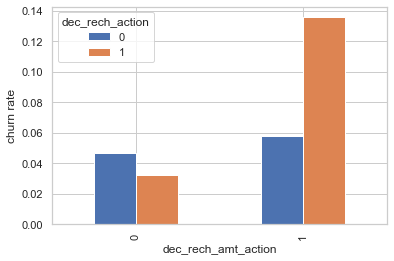

In [56]:
new_DF.pivot_table(values='Churn', index='dec_rech_amt_action', columns='dec_rech_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

📌 We can see from the above plot, that the churn rate is higher for the customers, whose recharge amount as well as number of recharge have decreased in the action phase when compared to the good phase.

In [57]:
# Function to create Box Plot for month 6,7 and 8
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = new_DF
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
    plt.show()


In [58]:
recharge_amnt_columns =  DF.columns[DF.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8']

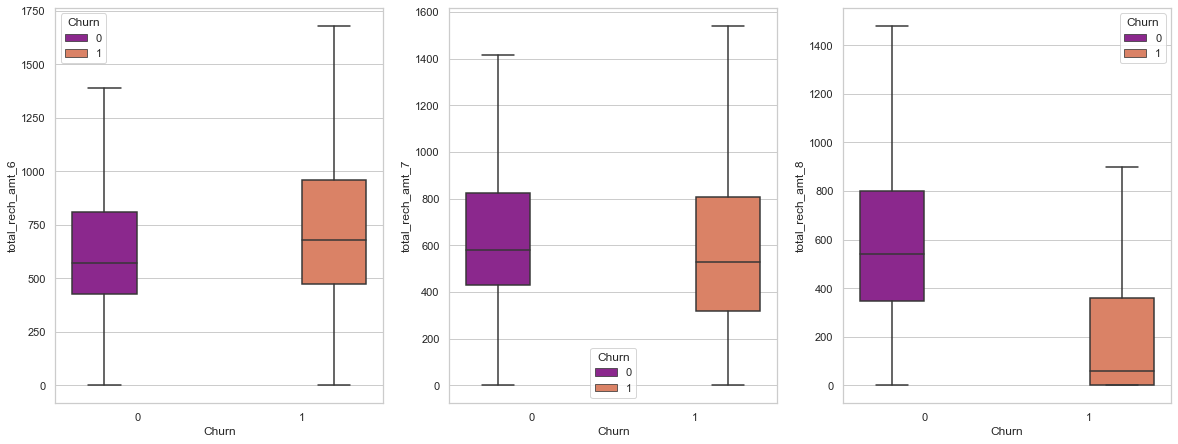

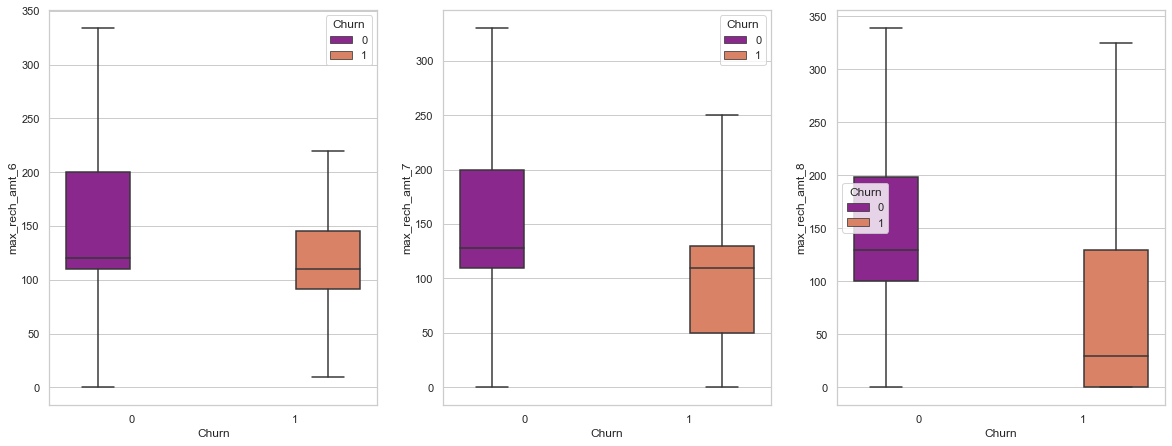

In [59]:
plot_box_chart('total_rech_amt')
plot_box_chart('max_rech_amt')

***From the above 2 plots we can see clearly that the reacharge amounts (Total & Maximum) started to fall in the month 8 i.e near to the churn phase.***

In [60]:
new_DF.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,Churn,avg_rech_num_action,diff_rech_num,dec_rech_action,avg_arpu_action,diff_arpu,dec_avg_revenuePC_action,avg_rech_amt_action,diff_rech_amt,dec_rech_amt_action,total_mou_good,avg_mou_action,diff_mou,dec_MOU_action
7,7000701601,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,"1,185.00",1,6.00,1.00,0,"2,260.66","1,191.48",0,"2,214.00",634.00,0,"1,113.99",973.09,-140.90,1
8,7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.00,0,17.50,-1.50,1,314.79,-63.93,1,360.50,-76.50,1,612.22,324.12,-288.10,1
13,7002191713,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.00,0.00,1.29,0.00,0.00,4.78,0.00,0.00,0.00,907.09,192.41,"1,015.26",67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,

In [61]:
# Dropping the Some of the Derived columns that are not needed furthur.

new_DF = new_DF.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_rech_6_7'], axis=1)

**-----------------------------------------------------------------------------------------------------------------------------------------------**

## Train Test Split

In [62]:
from sklearn.model_selection import train_test_split

# Putting feature variables into X
X = new_DF.drop(['mobile_number','Churn'], axis=1)

# Putting target variable to y
y = new_DF['Churn']

# Splitting data into train and test set 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [63]:
X_train.shape

(20710, 128)

**Dealing with Class Imbalance using SMOTE** (Synthetic Minority Oversampling Technique)

We are creating synthetic samples by doing upsampling using SMOTE

In [64]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

# Instantiating SMOTE
smt = SMOTE(random_state=27)

# Fittign SMOTE to the train set
X_train, y_train = smt.fit_resample(X_train, y_train)

In [65]:
X_train.shape

(37950, 128)

***FEATURE SCALING***

In [66]:
# Standardization method
from sklearn.preprocessing import StandardScaler

# Instantiate the Scaler
scaler = StandardScaler()

In [67]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,dec_rech_action,dec_avg_revenuePC_action,dec_rech_amt_action,dec_MOU_action
0,268.22,414.93,152.90,53.83,62.78,18.79,142.61,124.99,115.34,0.00,0.00,0.00,0.00,0.00,0.00,53.83,62.78,18.79,130.41,121.41,114.94,4.23,1.68,0.18,0.00,0.00,0.00,188.48,185.88,133.93,0.00,0.00,0.00,3.36,1.89,0.21,0.00,0.00,0.00,3.36,1.89,0.21,0.00,0.00,0.00,6.54,0.00,0.00,0.00,0.00,0.00,198.39,187.78,134.14,30.28,57.51,57.89,92.49,74.38,78.06,5.36,13.56,4.71,128.14,145.46,140.68,0.00,0.00,0.00,135.03,40.31,29.63,1.00,0.00,0.00,136.03,40.31,29.63,265.81,185.78,170.31,0.00,0.00,0.00,0.00,0.00,0.00,1.63,0.00,0.00,5,11,2,306,485,180,120,110,130,0,46,50,238.30,510.97,0.00,0.00,0.00,0.00,0,0,0,1,3,0,0,0,0,0,0,0,809,0.00,0.00,0.00,0,0,0,1
1,379.69,234.99,734.42,51.04,35.88,126.13,139.54,98.11,426.09,101.56,0.00,0.00,85.69,0.00,0.00,29.51,19.31,80.76,53.79,92.11,348.34,0.16,0.60,1.88,0.00,0.00,0.05,83.48,112.03,430.99,4.98,16.56,45.36,16.43,5.39,75.81,0.00,0.00,0.00,21.41,21.96,121.18,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,104.89,133.99,552.23,60.31,79.64,157.86,118.28,348.68,585.24,7.41,25.88,37.29,186.01,454.21,780.41,0.00,2.79,1.59,21.21,41.18,2.01,0.00,0.40,0.00,21.21,44.38,3.61,207.23,499.26,788.29,0.00,0.00,0.00,0.00,0.66,4.26,0.00,0.00,0.00,9,10,8,470,348,839,110,128,169,110,128,169,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,2929,0.00,0.00,0.00,0,0,0,0
2,257.81,466.92,205.49,59.96,87.63,36.39,50.28,119.91,72.08,0.00,0.00,0.00,0.00,0.00,0.00,59.96,87.63,36.39,49.74,119.13,70.23,0.53,0.78,1.84,0.00,0.00,0.00,110.24,207.54,108.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,110.24,207.54,108.48,13.09,32.93,37.39,237.86,353.94,225.56,0.40,0.46,0.26,251.36,387.34,263.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,251.36,387.34,263.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7,10,5,271,564,246,110,154,65,37,154,61,0.00,0.00,0.00,0.00,16.06,0.00,0,1,0,0,0,0,0,0,0,0,0,0,648,97.09,0.00,0.00,0,0,0,0
3,"1,106.55",807.25,793.07,538.29,410.63,533.19,170.53,137.16,179.44,0.00,0.00,0.00,0.00,0.00,0.00,42.11,36.16,30.81,52.78,41.36,41.74,0.00,0.65,0.21,0.00,0.80,0.00,94.89,78.18,72.78,496.18,374.46,502.38,117.74,93.03,137.48,0.0

****Scaling the TRAIN data set****

In [68]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('dec_MOU_action')
cols_scale.remove('dec_rech_action')
cols_scale.remove('dec_rech_amt_action')
cols_scale.remove('dec_avg_revenuePC_action')


In [69]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [70]:

X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,dec_rech_action,dec_avg_revenuePC_action,dec_rech_amt_action,dec_MOU_action
0,-0.93,-0.38,-0.61,-0.59,-0.52,-0.45,-0.61,-0.59,-0.37,-0.22,-0.19,-0.21,-0.27,-0.29,-0.28,-0.12,-0.04,-0.20,-0.09,-0.08,0.06,-0.06,-0.19,-0.25,-0.25,-0.19,-0.21,-0.14,-0.09,-0.10,-0.55,-0.52,-0.38,-0.55,-0.53,-0.40,-0.16,-0.14,-0.13,-0.77,-0.73,-0.52,-0.12,-0.11,-0.07,0.01,-0.36,-0.28,-0.35,-0.02,-0.02,-0.82,-0.75,-0.50,-0.21,0.01,0.12,-0.22,-0.28,-0.11,-0.17,0.04,-0.13,-0.28,-0.18,-0.03,-0.26,-0.24,-0.19,1.29,0.15,0.12,-0.08,-0.15,-0.11,0.78,-0.04,-0.02,-0.01,-0.20,-0.06,-0.37,-0.10,-0.16,-0.19,-0.18,-0.13,0.05,-0.11,-0.09,-0.82,-0.07,-0.70,-0.96,-0.36,-0.55,-0.23,-0.27,0.09,-0.79,-0.34,-0.11,0.69,1.72,-0.21,-0.29,-0.29,-0.25,-0.25,-0.26,-0.23,0.41,1.53,-0.27,-0.25,-0.25,-0.22,-0.14,-0.14,-0.11,-0.29,-0.27,-0.29,-0.29,0,0,0,1
1,-0.61,-0.93,0.98,-0.60,-0.58,-0.18,-0.62,-0.65,0.41,1.07,-0.19,-0.21,0.43,-0.29,-0.28,-0.24,-0.26,0.15,-0.45,-0.22,1.29,-0.29,-0.26,-0.14,-0.25,-0.19,-0.20,-0.46,-0.32,0.91,-0.54,-0.48,-0.25,-0.53,-0.52,-0.17,-0.16,-0.14,-0.13,-0.75,-0.70,-0.28,-0.12,-0.11,-0.07,-0.36,-0.36,-0.27,-0.35,-0.02,-0.02,-0.96,-0.83,0.20,0.01,0.17,0.91,-0.09,1.18,2.78,-0.12,0.34,0.81,-0.08,0.94,2.47,-0.26,-0.20,-0.16,-0.11,0.16,-0.23,-0.15,-0.12,-0.11,-0.24,-0.00,-0.27,-0.19,0.78,1.99,-0.37,-0.10,-0.16,-0.19,-0.16,-0.05,-0.10,-0.11,-0.09,-0.41,-0.18,0.03,-0.56,-0.71,0.96,-0.30,-0.16,0.36,0.12,0.34,0.95,-0.26,-0.25,-0.21,-0.29,-0.29,-0.25,-0.25,-0.26,-0.23,-0.27,-0.27,-0.27,-0.25,-0.25,-0.22,-0.14,-0.14,-0.11,2.11,-0.27,-0.29,-0.29,0,0,0,0
2,-0.96,-0.22,-0.46,-0.58,-0.47,-0.41,-0.80,-0.60,-0.48,-0.22,-0.19,-0.21,-0.27,-0.29,-0.28,-0.09,0.08,-0.10,-0.47,-0.09,-0.18,-0.27,-0.24,-0.14,-0.25,-0.19,-0.21,-0.37,-0.02,-0.19,-0.55,-0.52,-0.38,-0.56,-0.53,-0.40,-0.16,-0.14,-0.13,-0.78,-0.73,-0.52,-0.12,-0.11,-0.07,-0.36,-0.36,-0.28,-0.35,-0.02,-0.02,-0.95,-0.72,-0.55,-0.33,-0.16,-0.04,0.51,1.21,0.73,-0.31,-0.28,-0.25,0.15,0.70,0.45,-0.26,-0.24,-0.19,-0.37,-0.33,-0.26,-0.15,-0.15,-0.11,-0.43,-0.39,-0.30,-0.05,0.43,0.25,-0.37,-0.10,-0.16,-0.19,-0.18,-0.13,-0.10,-0.11,-0.09,-0.62,-0.18,-0.34,-1.04,-0.16,-0.40,-0.30,0.01,-0.37,-0.48,0.56,-0.01,-0.26,-0.25,-0.21,-0.29,-0.26,-0.25,-0.25,3.06,-0.23,-0.27,-0.27,-0.27,-0.

****Scaling the TEST DATA set****

We do not fit scaler on the TEST data set. We can only transform TEST set.

In [71]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,dec_rech_action,dec_avg_revenuePC_action,dec_rech_amt_action,dec_MOU_action
86948,0.23,1.42,1.00,2.46,4.59,3.70,-0.82,-0.42,-0.37,-0.22,-0.19,-0.21,-0.27,-0.29,-0.28,-0.33,-0.22,-0.15,-0.52,-0.37,-0.11,-0.30,-0.29,0.18,-0.16,0.44,0.21,-0.56,-0.40,-0.15,2.81,5.10,4.31,-0.56,-0.23,-0.33,-0.16,-0.14,-0.13,1.53,3.27,2.65,-0.12,-0.11,-0.07,-0.32,-0.04,-0.13,-0.35,-0.02,-0.02,1.20,2.92,2.20,-0.31,-0.24,-0.19,-0.38,-0.16,0.02,-0.31,-0.30,-0.26,-0.45,-0.28,-0.12,-0.26,-0.20,-0.09,-0.37,-0.33,-0.25,-0.15,-0.15,-0.11,-0.42,-0.36,-0.25,-0.58,-0.41,-0.11,2.96,-0.10,-0.16,-0.19,-0.18,0.41,-0.10,-0.11,-0.09,-0.41,0.15,0.03,-0.02,1.57,0.86,-0.30,-0.27,0.09,0.12,0.19,0.60,-0.26,-0.25,-0.21,-0.29,-0.29,-0.25,-0.25,-0.26,-0.23,-0.27,-0.27,-0.27,-0.25,-0.25,-0.22,-0.14,-0.14,-0.11,0.40,-0.27,-0.29,-0.29,0,0,0,0
84276,1.22,2.43,2.28,2.13,2.75,2.56,0.41,1.30,2.21,-0.22,-0.19,-0.21,-0.27,-0.29,-0.28,-0.36,-0.20,-0.01,-0.53,-0.25,0.39,-0.30,-0.29,-0.26,-0.25,-0.19,-0.21,-0.58,-0.30,0.23,2.47,3.10,2.94,0.74,1.57,2.48,-0.16,-0.14,-0.13,2.22,3.20,3.59,-0.12,-0.11,-0.07,0.22,0.44,0.07,-0.35,-0.02,-0.02,1.87,2.92,3.21,-0.39,-0.13,-0.11,-0.64,-0.31,-0.01,-0.32,-0.30,-0.18,-0.68,-0.32,-0.09,-0.25,-0.19,0.05,-0.29,-0.18,0.05,-0.15,-0.15,-0.11,-0.37,-0.25,0.05,-0.76,-0.40,-0.09,-0.37,-0.10,-0.16,-0.19,-0.18,-0.13,-0.10,-0.11,-0.09,2.33,4.73,3.47,1.12,2.27,2.24,-0.30,-0.65,0.09,-0.54,-0.47,-0.11,-0.26,-0.25,-0.21,-0.29,-0.29,-0.25,-0.25,-0.26,-0.23,-0.27,0.33,-0.27,-0.25,-0.25,-0.22,-0.14,-0.14,-0.11,-0.00,-0.27,-0.29,-0.29,0,0,0,0
57054,1.07,0.52,0.90,3.76,2.67,3.04,-0.07,-0.34,-0.27,-0.22,-0.19,-0.21,-0.27,-0.29,-0.28,-0.30,-0.33,-0.22,-0.65,-0.59,-0.49,-0.30,-0.29,-0.26,-0.25,-0.19,-0.21,-0.62,-0.61,-0.46,4.19,3.07,3.59,0.28,-0.03,0.03,-0.16,-0.14,-0.13,3.08,2.04,2.41,-0.12,-0.11,-0.07,-0.36,-0.36,-0.28,-0.35,-0.02,-0.02,2.67,1.64,1.84,-0.36,-0.34,-0.19,-0.44,-0.55,-0.45,-0.32,-0.13,-0.17,-0.52,-0.57,-0.42,0.03,14.63,20.20,-0.15,-0.33,-0.04,-0.13,-0.15,-0.08,-0.11,7.37,9.82,-0.53,2.12,3.04,-0.37,-0.10,-0.16,-0.19,-0.18,-0.13,0.10,-0.02,-0.03,0.10,-0.18,-0.09,1.12,0.63,0.95,-0.30,0.30,0.19,0.12,0.34,0.60,-0.26,-0.25,-0.21,-0.29,-0.29,-0.25,-0.25,-0.26,-0.23,-0.27,-0.27,-0.27,-0.25,-0.25,-0.22,-0.14,-0.14,-0.11,

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Model building with PCA
(Principal Component Analysis)

In [72]:
#Import PCA
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA(random_state=42)

# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [73]:
# Looking at the Principal components
pca.components_

array([[ 4.74929947e-02,  1.21883370e-01,  1.67634074e-01, ...,
        -3.15224458e-02, -3.31653208e-02, -3.00270648e-02],
       [ 8.81375996e-02,  1.67453338e-01,  1.25285766e-01, ...,
        -1.75822580e-02, -1.89207240e-02, -1.82081336e-02],
       [-4.74632197e-02,  1.10425383e-01,  1.73140641e-01, ...,
        -6.46448081e-02, -6.39465203e-02, -6.53208117e-02],
       ...,
       [-5.21829161e-08,  2.63019555e-07,  3.03895563e-07, ...,
        -2.40567449e-07, -1.31073306e-07, -8.10356031e-08],
       [-3.27840869e-07, -6.43658112e-08, -2.47278131e-07, ...,
        -1.49350696e-07,  8.92889188e-08,  1.36120336e-08],
       [ 2.62334665e-07, -2.80628481e-07, -4.55739059e-08, ...,
        -2.10265570e-07,  8.29310445e-08, -2.25285623e-07]])

In [74]:
# Cumuliative varinace of the principal components.
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.10608524 0.18479063 0.23811416 0.28172622 0.32047572 0.35644017
 0.39187522 0.4191053  0.44442622 0.46884482 0.49172244 0.51354553
 0.53468352 0.55522455 0.57360395 0.59174273 0.60886881 0.62350872
 0.63706131 0.6503275  0.66334287 0.67589671 0.68772917 0.69935069
 0.7105682  0.72165194 0.73239099 0.74171554 0.75047539 0.75916312
 0.76740054 0.7755803  0.78356816 0.79131215 0.79892374 0.80624572
 0.81339173 0.81998992 0.82641091 0.8327114  0.83871451 0.8443954
 0.84976737 0.85498375 0.86007883 0.86507652 0.87000955 0.87476917
 0.87940043 0.88391204 0.888344   0.89266409 0.89667896 0.9005218
 0.90428956 0.90800673 0.91162824 0.91523741 0.9186897  0.92211376
 0.92547925 0.92874335 0.93182594 0.93482091 0.9377449  0.94059916
 0.94341547 0.94619384 0.94884492 0.95146971 0.95398393 0.95641458
 0.95876153 0.96103941 0.96323668 0.96532558 0.96733435 0.9692959
 0.97124601 0.97313916 0.97502376 0.97684113 0.97860156 0.98033898
 0.98202207 0.9836435  0.98521477 0.98674627 0.98812646 0.9894264

Text(0, 0.5, 'Cumulative Variance')

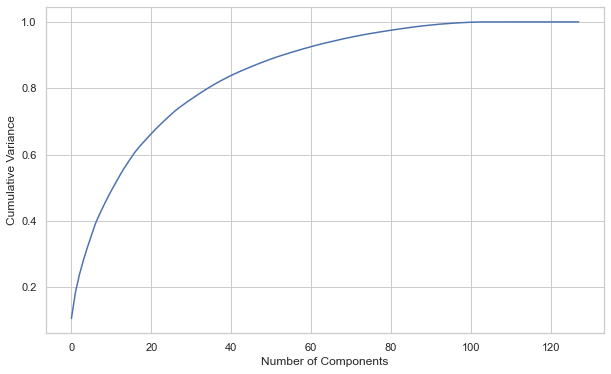

In [75]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

*  We can see that almost *60 components* explain almost more than 90% variance of the data.
*  So, we will perform PCA with 60 components.

In [76]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

*Applying transformation on the test set*


We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.

In [77]:
X_test_pca = pca_final.transform(X_test)

**Emphasize Sensitivity/Recall than Accuracy**


We are more focused on higher Sensitivity/Recall score than the accuracy.

Beacuse we need to care more about churn cases than the not churn cases. The main goal is to reatin the customers, who have the possiblity to churn. That should not be a problem, if we consider few not churn customers as churn customers and provide them some incentives for retaining them. Hence, the sensitivity score is more important here.

************************************************************************************************************************************************************************************************************************

## Logistic regression with PCA

In [78]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

***Tuning hyperparameter C***


C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [79]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Using GridSearchCV

In [80]:

# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [81]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.23,0.02,0.00,0.00,0.01,{'C': 0.01},0.86,0.87,0.87,0.86,0.86,0.87,0.00,6,0.87,0.87,0.87,0.86,0.87,0.87,0.00
1,0.25,0.01,0.00,0.00,0.10,{'C': 0.1},0.86,0.87,0.87,0.87,0.86,0.87,0.00,1,0.87,0.87,0.87,0.87,0.87,0.87,0.00
2,0.26,0.01,0.00,0.00,1,{'C': 1},0.86,0.87,0.87,0.87,0.86,0.87,0.00,2,0.87,0.87,0.87,0.87,0.87,0.87,0.00
3,0.26,0.01,0.00,0.00,10,{'C': 10},0.86,0.87,0.87,0.87,0.86,0.87,0.00,2,0.87,0.87,0.87,0.87,0.87,0.87,0.00
4,0.26,0.01,0.00,0.00,100,{'C': 100},0.86,0.87,0.87,0.87,0.86,0.87,0.00,2,0.87,0.87,0.87,0.87,0.87,0.87,0.00
5,0.26,0.01,0.00,0.00,1000,{'C': 1000},0.86,0.87,0.87,0.87,0.86,0.87,0.00,2,0.87,0.87,0.87,0.87,0.87,0.87,0.00


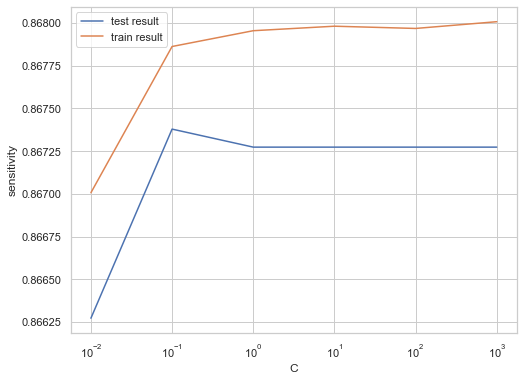

In [82]:
 # plotting C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='best')
plt.xscale('log')

In [83]:

# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8673792438282055 at C = 0.1


## Logistic regression with optimal C

In [84]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

Prediction on the train set

In [85]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

Creating function for Confusion Matrix to be used furthur

In [86]:
def confusion(A,P):                    # A= actual, P= Predicted.
    actual = np.random.binomial(1,.9,size = 1000)
    predicted = np.random.binomial(1,.9,size = 1000)

    confusion_matrix = metrics.confusion_matrix(A, P)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    return cm_display.plot()  

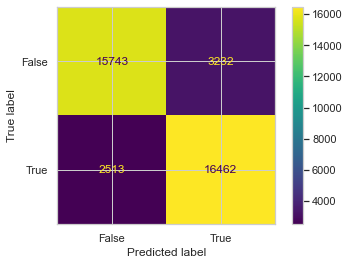

In [87]:
# Confusion Matrix
confusion(y_train, y_train_pred)

In [89]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [90]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# Recall
print("Recall:-" , TP/float(TP+FN))

Accuracy:- 0.8486166007905138
Sensitivity:- 0.867562582345191
Specificity:- 0.8296706192358366
Recall:- 0.867562582345191


Prediction on the test set

In [91]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [92]:
# Confusion matrix

confusion(y_test, y_test_pred)

[[6707 1400]
 [ 153  616]]


In [93]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [94]:

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# Recall
print("Recall:-" , TP/float(TP+FN))

Accuracy:- 0.8250337990085624
Sensitivity:- 0.8010403120936281
Specificity:- 0.8273097323300851
Recall:- 0.8010403120936281


**Model summary** (Logistic Regression with PCA)

-  `Train set`
  * Accuracy = 0.84
  * Sensitivity = 0.86
  * Specificity = 0.82
-  `Test set`
  * Accuracy = 0.82
  * Sensitivity = 0.80
  * Specificity = 0.82

OverAll we can see that the model is performing well in the TEST set, as per what it has learned from the TRAIN set.

*******************************************************************************************************************************************************************************************************************************

## Decision tree with PCA

In [95]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

**Hyperparameter tuning**

In [96]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model for best results.
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [97]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.98,0.01,0.00,0.00,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.77,0.82,0.76,0.78,0.78,0.78,0.02,5
1,0.96,0.01,0.00,0.00,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.77,0.82,0.76,0.78,0.78,0.78,0.02,5
2,0.96,0.01,0.00,0.00,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.76,0.82,0.76,0.78,0.78,0.78,0.02,7
3,0.97,0.02,0.01,0.00,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.76,0.82,0.76,0.78,0.78,0.78,0.02,7
4,1.60,0.06,0.01,0.00,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.83,0.84,0.83,0.85,0.85,0.84,0.01,1
5,1.57,0.02,0.00,0.00,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.83,0.84,0.83,0.85,0.85,0.84,0.01,1
6,1.49,0.02,0.00,0.00,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.81,0.84,0.82,0.84,0.82,0.83,0.01,3
7,1.47,0.04,0.00,0.00,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.81,0.84,0.82,0.84,0.82,0.83,0.01,4


In [98]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.838102766798419
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


**Model with optimal hyperparameters**

In [99]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

**Prediction on the train set**

In [100]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)


# Creating Confusion matrix

confusion(y_train, y_train_pred)

[[16463  2512]
 [ 2557 16418]]


In [101]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [102]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# Recall
print("Recall:-" , TP/float(TP+FN))

Accuracy:- 0.866429512516469
Sensitivity:- 0.8652437417654809
Specificity:- 0.8676152832674572
Recall:- 0.8652437417654809


**Prediction on the test set**

In [103]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [115]:
# Confusion matrix

confusion(y_test, y_test_pred)

TypeError: 'numpy.ndarray' object is not callable

In [105]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# Recall
print("Recall:-" , TP/float(TP+FN))

Accuracy:- 0.8289770166741776
Sensitivity:- 0.8652437417654809
Specificity:- 0.8676152832674572
Recall:- 0.8652437417654809


In [106]:
# from sklearn.metrics import classification_report,confusion_matrix
# y_pred = dt_pca_model.predict(X_test_pca)
# print(classification_report(y_test, y_pred))

**Model summary** (Decesion Trees with PCA)

-  `Train set`
  * Accuracy = 0.86
  * Sensitivity = 0.86
  * Specificity = 0.86
-  `Test set`
  * Accuracy = 0.82
  * Sensitivity = 0.86
  * Specificity = 0.86

We can see from the model performance that the Sesitivity and Specificity remains same while evaluating the model on the test set and Train Set. However, the accuracy dropped a little in  TEST set but still it is quite good in the test set.


*******************************************************************************************************************************************************************************************************************************

## Random forest with PCA

In [107]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

**Hyperparameter tuning**

In [108]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [109]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8320948616600791 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 300}


**Model with optimal hyperparameters**

In [110]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=10,
                             n_estimators=200, oob_score=True)

In [111]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=200, oob_score=True)

In [112]:
rfc_model.oob_score_

0.8328063241106719

OOB Score tells how accuarte will be our model, we calculated the OOB score based on the Train data set. Now, next we will also see the predictions and other metrics.

**Prediction on the train set**

In [113]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [119]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[16516  2459]
 [ 3643 15332]]


In [121]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [122]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# Recall
print("Recall:-" , TP/float(TP+FN))

Accuracy:- 0.8392094861660079
Sensitivity:- 0.7100130039011704
Specificity:- 0.8560503268780066
Recall:- 0.7100130039011704


**Prediction on the test set**

In [123]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [124]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6940 1167]
 [ 223  546]]


In [125]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# Recall
print("Recall:-" , TP/float(TP+FN))

print("F-1 Score:-",metrics.f1_score(y_test, y_test_pred))

Accuracy:- 0.8433979269941415
Sensitivity:- 0.7100130039011704
Specificity:- 0.8560503268780066
Recall:- 0.7100130039011704
F-1 Score:- 0.43996776792908937


In [126]:
# from sklearn.metrics import classification_report,confusion_matrix
# y_pred = rfc_model.predict(X_test_pca)
# print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      8107
           1       0.32      0.71      0.44       769

    accuracy                           0.84      8876
   macro avg       0.64      0.78      0.67      8876
weighted avg       0.91      0.84      0.87      8876



**Model summary** (Random Forest with PCA)

-  `Train set`
  * Accuracy = 0.83
  * Sensitivity = 0.80
  * Specificity = 0.86
-  `Test set`
  * Accuracy = 0.84
  * Sensitivity = 0.80
  * Specificity = 0.86

We can see from the model performance that the Sesitivity and Specificity remains same while evaluating the model on the test set. However, the accuracy increased in TEST set slightly which is quite good for the test set.

#### Conclusion on Modelling with PCA

We built 3 different models to achieve best sensitivity. All the three models performed very well and gave more or less comparable results. Highest sentitvity came from Decesion Trees being 86% whereas Random forest gave us the best accuracy of 84%.

****************************************************************************************************************************************************************************

# Modelling without PCA

#### Logistic Regression without PCA

In [128]:

import statsmodels.api as sm

# Instantiate the model and also Adding the constant to X_train

log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

# Fitting the model
log_no_pca = log_no_pca.fit().summary()

# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37950
Model:                            GLM   Df Residuals:                    37821
Model Family:                Binomial   Df Model:                          128
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12561.
Date:                Sun, 08 Jan 2023   Deviance:                       25122.
Time:                        10:06:59   Pearson chi2:                 1.10e+07
No. Iterations:                    10   Pseudo R-squ. (CS):             0.5153
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.6461      0.045     14.298      0.000       0.558       0.735
arpu_6                       0.1828      0.067      2.748      0.006       0.052       0.313
arpu_7                       0.4026      0.068      5.939      0.000       0.270       0.535
arpu_8                       0.8742      0.084     10.358      0.000       0.709       1.040
onnet_mou_6                  4.4535      1.964      2.268      0.023       0.605       8.302
onnet_mou_7                  1.0193      1.306      0.780      0.435      -1.541       3.579
onnet_mou_8                 -2.0181      1.100     -1.835      0.067      -4.174       0.138
offnet_mou_6                 5.2426      1.998      2.624      0.009       1.326       9.159
offnet_mou_7                 2.9934      1.324      2.260      0.024       0.397       5.589
offnet_mou_8                -3.5329      1.105     -3.199      0.001      -5.698      -1.368
roam_ic_mou_6                0.0207      0.027      0.758      0.449      -0.033       0.074
roam_ic_mou_7                0.0402      0.032      1.274      0.203      -0.022       0.102
roam_ic_mou_8               -0.0662      0.026     -2.543      0.011      -0.117      -0.015
roam_og_mou_6               -1.2798      0.491     -2.607      0.009      -2.242      -0.318
roam_og_mou_7               -0.4065      0.272     -1.494      0.135      -0.940       0.127
roam_og_mou_8                0.8672      0.276      3.140      0.002       0.326       1.409
loc_og_t2t_mou_6           197.2404    675.181      0.292      0.770   -1126.089    1520.570
loc_og_t2t_mou_7         -1535.5394    642.494     -2.390      0.017   -2794.804    -276.275
loc_og_t2t_mou_8          5929.2444    593.225      9.995      0.000    4766.545    7091.944
loc_og_t2m_mou_6           200.0284    686.660      0.291      0.771   -1145.800    1545.857
loc_og_t2m_mou_7         -1568.1718    655.757     -2.391      0.017   -2853.432    -282.912
loc_og_t2m_mou_8          6365.7103    636.798      9.996      0.000    5117.610    7613.811
loc_og_t2f_mou_6            16.3277     55.754      0.293      0.770     -92.948     125.604
loc_og_t2f_mou_7          -131.2664     54.864     -2.393      0.017    -238.798     -23.735
loc_og_t2f_mou_8           530.8900     53.112      9.996      0.000     426.793     634.987
loc_og_t2c_mou_6            -0.0642      0.023     -2.822      0.005      -0.109      -0.020
loc_og_t2c_mou_7             0.1573      0.028      5.699      0.000       0.103       0.211
loc_og_t2c_mou_8            -0.0143      0.022     -0.664      0.507      -0.056       0.028
loc_og_mou_6             -3238.4144   1306.382     -2.479      0.013   -5798.876    -677.953
loc_og_mou_7              1548.2457   1309.665      1.182      0.237   -1018.650    4115.141
loc_og_mou_8  

1. As we see there are Many features with high p-values and hence those are insignificant for our model.
2. Also, there are few features with negative coefficients as well.

**Tuning the parameters**

First we will Select some of the features using RFE and then we will manually eleminate the remaining features based on p-values and VIF, untill we get a best model.

***Feature selection using RFE***

In [129]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

**Using RFE with 15 columns/features**

In [130]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg, n_features_to_select=15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train,y_train)

In [131]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['arpu_6', 'loc_og_mou_8', 'og_others_8', 'total_og_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'total_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'dec_rech_action',
       'dec_avg_revenuePC_action'],
      dtype='object')


### Model-1

In [132]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37950
Model:                            GLM   Df Residuals:                    37934
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14537.
Date:                Sun, 08 Jan 2023   Deviance:                       29074.
Time:                        10:08:31   Pearson chi2:                 6.09e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4622
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.4013      0.033     12.024      0.000       0.336       0.467
arpu_6                       0.7633      0.023     33.182      0.000       0.718       0.808
loc_og_mou_8                -0.6820      0.039    -17.572      0.000      -0.758      -0.606
og_others_8                 -0.7129      0.324     -2.201      0.028      -1.348      -0.078
total_og_mou_8              -0.5292      0.023    -23.048      0.000      -0.574      -0.484
loc_ic_t2m_mou_7             0.7341      0.037     19.658      0.000       0.661       0.807
loc_ic_t2m_mou_8            -1.2458      0.072    -17.274      0.000      -1.387      -1.104
total_ic_mou_8              -0.8028      0.052    -15.308      0.000      -0.906      -0.700
total_rech_num_8            -0.6527      0.023    -28.432      0.000      -0.698      -0.608
last_day_rch_amt_8          -0.6683      0.024    -27.427      0.000      -0.716      -0.621
monthly_2g_7                -0.3720      0.026    -14.420      0.000      -0.423      -0.321
monthly_2g_8                -0.7020      0.041    -17.290      0.000      -0.782      -0.622
sachet_2g_8                 -0.3836      0.023    -16.800      0.000      -0.428      -0.339
monthly_3g_8                -0.8621      0.035    -24.541      0.000      -0.931      -0.793
dec_rech_action             -0.7612      0.038    -19.776      0.000      -0.837      -0.686
dec_avg_revenuePC_action    -0.7772      0.041    -18.930      0.000      -0.858      -0.697
============================================================================================
"""

**Checking VIF**

In [133]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [134]:
def VIF_CALC(df):
    vif=pd.DataFrame()
    vif['Features']= df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif=vif.sort_values(by="VIF", ascending=False)
    return vif

In [135]:
VIF_CALC(X_train[rfe_cols])

,Features,VIF
5,loc_ic_t2m_mou_8,4.24
14,dec_avg_revenuePC_action,3.32
13,dec_rech_action,3.19
6,total_ic_mou_8,2.96
4,loc_ic_t2m_mou_7,2.33
3,total_og_mou_8,1.87
1,loc_og_mou_8,1.78
7,total_rech_num_8,1.64
10,monthly_2g_8,1.50
9,monthly_2g_7,1.49


Removing column og_others_8, which is insignificatnt as it has the non-zero p-value 0.028

In [136]:
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
print(log_cols)

['arpu_6', 'loc_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'total_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'dec_rech_action', 'dec_avg_revenuePC_action']


### Model-2

In [137]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37950
Model:                            GLM   Df Residuals:                    37935
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14546.
Date:                Sun, 08 Jan 2023   Deviance:                       29092.
Time:                        10:10:33   Pearson chi2:                 6.16e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4619
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.4128      0.033     12.608      0.000       0.349       0.477
arpu_6                       0.7628      0.023     33.177      0.000       0.718       0.808
loc_og_mou_8                -0.6845      0.039    -17.628      0.000      -0.761      -0.608
total_og_mou_8              -0.5289      0.023    -23.040      0.000      -0.574      -0.484
loc_ic_t2m_mou_7             0.7343      0.037     19.667      0.000       0.661       0.808
loc_ic_t2m_mou_8            -1.2457      0.072    -17.273      0.000      -1.387      -1.104
total_ic_mou_8              -0.8038      0.052    -15.336      0.000      -0.907      -0.701
total_rech_num_8            -0.6535      0.023    -28.477      0.000      -0.698      -0.609
last_day_rch_amt_8          -0.6682      0.024    -27.435      0.000      -0.716      -0.620
monthly_2g_7                -0.3715      0.026    -14.399      0.000      -0.422      -0.321
monthly_2g_8                -0.7028      0.041    -17.312      0.000      -0.782      -0.623
sachet_2g_8                 -0.3840      0.023    -16.821      0.000      -0.429      -0.339
monthly_3g_8                -0.8625      0.035    -24.556      0.000      -0.931      -0.794
dec_rech_action             -0.7611      0.038    -19.783      0.000      -0.837      -0.686
dec_avg_revenuePC_action    -0.7768      0.041    -18.926      0.000      -0.857      -0.696
============================================================================================
"""

In [138]:
# Checking VIF of Model-2

VIF_CALC(X_train[log_cols])

,Features,VIF
4,loc_ic_t2m_mou_8,4.24
13,dec_avg_revenuePC_action,3.32
12,dec_rech_action,3.19
5,total_ic_mou_8,2.96
3,loc_ic_t2m_mou_7,2.33
2,total_og_mou_8,1.87
1,loc_og_mou_8,1.78
6,total_rech_num_8,1.64
9,monthly_2g_8,1.50
8,monthly_2g_7,1.49


Here we see the p-values are in the Acceptable Range also the VIF's of all the values are also below 5 which is a good and acceptable range.

Hence **Model-2** will be the final Model

#### Model performance on the train set

In [139]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_2.predict(X_train_sm_2)
y_train_pred_no_pca.head()

0                   0.75
1                   0.01
2                   0.36
3                   0.74
4                   0.01
dtype: float64

In [140]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.75,0
1,0,0.01,1
2,0,0.36,2
3,0,0.74,3
4,0,0.01,4


Finding the Optimal Probablity CutOff Point.

In [141]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.75,0,1,1,1,1,1,1,1,1,0,0
1,0,0.01,1,1,0,0,0,0,0,0,0,0,0
2,0,0.36,2,1,1,1,1,0,0,0,0,0,0
3,0,0.74,3,1,1,1,1,1,1,1,1,0,0
4,0,0.01,4,1,0,0,0,0,0,0,0,0,0


Now Calculation of the accuracy sensitivity and specificity for various probability cutoffs.

In [142]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

              probability             accuracy          sensitivity  \
0.00                 0.00                 0.50                 1.00   
0.10                 0.10                 0.71                 0.97   
0.20                 0.20                 0.77                 0.96   
0.30                 0.30                 0.80                 0.93   
0.40                 0.40                 0.83                 0.91   
0.50                 0.50                 0.84                 0.87   
0.60                 0.60                 0.85                 0.82   
0.70                 0.70                 0.84                 0.75   
0.80                 0.80                 0.79                 0.62   
0.90                 0.90                 0.64                 0.29   

              specificity  
0.00                 0.00  
0.10                 0.45  
0.20                 0.58  
0.30                 0.67  
0.40                 0.75  
0.50                 0.82  
0.60                 0

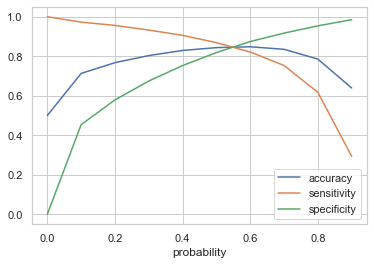

In [143]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

Analysis of the above curve

Accuracy - Becomes stable around 0.6 (0.55)

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

At point 0.55 appox. where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.55 as the optimum probability cutoff, we are taking **0.5**

In [144]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.75,0,1,1,1,1,1,1,1,1,0,0,1
1,0,0.01,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.36,2,1,1,1,1,0,0,0,0,0,0,0
3,0,0.74,3,1,1,1,1,1,1,1,1,0,0,1
4,0,0.01,4,1,0,0,0,0,0,0,0,0,0,0


***Evaluation Metrics***

In [146]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[15530  3445]
 [ 2492 16483]]


In [147]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [148]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# Recall
print("Recall:-" , TP/float(TP+FN))

Accuracy:- 0.8435573122529644
Sensitivity:- 0.86866930171278
Specificity:- 0.8184453227931489
Recall:- 0.86866930171278


📌 Here as we can see we got good accuracy, sensitivity and specificity on the train set prediction.

In [149]:
# Plotting the ROC curve.

# ROC Curve function

def PLOT_ROC( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

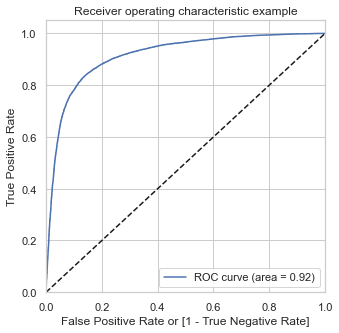

In [150]:

PLOT_ROC(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

📌 As we can see from the curve we are getting a AUC value of 0.92 which is a very good value, there by indicating that we have a good predictive model.

#### Model Performance on the test set

In [151]:
# Taking a copy of the test set
X_test_log = X_test.copy()

# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

In [152]:
# Predict on the test set using the FINAL MODEL i.e MODEL-2
y_test_pred = log_no_pca_2.predict(X_test_sm)

y_test_pred.head()

86948                   0.40
84276                   0.09
57054                   0.05
37711                   0.50
67273                   0.01
dtype: float64

In [153]:
# Converting y_test_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
86948,0.40
84276,0.09
57054,0.05
37711,0.50
67273,0.01


In [154]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn
86948,0
84276,0
57054,0
37711,0
67273,0


In [155]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [156]:

# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [157]:
# Concatinating y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

y_test_pred_final.head()

,Churn,CustID,0
0,0,86948,0.40
1,0,84276,0.09
2,0,57054,0.05
3,0,37711,0.50
4,0,67273,0.01


In [158]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

y_test_pred_final.head()

,Churn,CustID,churn_prob
0,0,86948,0.40
1,0,84276,0.09
2,0,57054,0.05
3,0,37711,0.50
4,0,67273,0.01


In [159]:
# In the test set using optimal probablity cutoff 0.5, that we considered previously. 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

y_test_pred_final.head()

,Churn,CustID,churn_prob,test_predicted
0,0,86948,0.40,0
1,0,84276,0.09,0
2,0,57054,0.05,0
3,0,37711,0.50,0
4,0,67273,0.01,0


***EVALUATION METRICS***

In [161]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['Churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[6616 1491]
 [ 148  621]]


In [166]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['Churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# Recall
print("Recall:-" , TP/float(TP+FN))

print("F-1 Score :-",metrics.f1_score(y_test_pred_final['Churn'], y_test_pred_final['test_predicted']))

print("Precision Score :-",metrics.precision_score(y_test_pred_final['Churn'], y_test_pred_final['test_predicted']))

Accuracy:- 0.8153447498873366
Sensitivity:- 0.86866930171278
Specificity:- 0.8184453227931489
Recall:- 0.86866930171278
F-1 Score :- 0.4311003123915307
Precision Score :- 0.2940340909090909


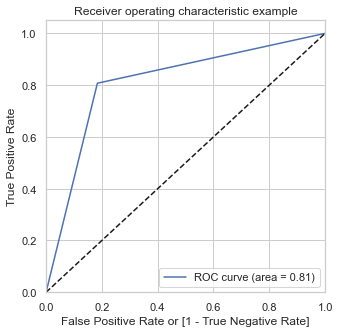

In [164]:
PLOT_ROC(y_test_pred_final['Churn'], y_test_pred_final['test_predicted'])

📌 As we can see we from the above ROC plot we get AUC of 0.81 which is a good value to go with.

~**Model summary** (Logistic Regression Without PCA)~

-  `Train set`
  * Accuracy = 0.84
  * Sensitivity = 0.86
  * Specificity = 0.81
-  `Test set`
  * Accuracy = 0.81
  * Sensitivity = 0.86
  * Specificity = 0.81